# HOMEWORK ASSIGNMENT 3
Anna Garbo: 2091751

## Random Matrix 
Built following the instruction:
In the random case, we construct the matrices in the following way: i) For each off-diagonal coefficient Mij,i!=j , we draw a random value p from a uniform distribution U [0, 1]. ii) If the value is p ≤ C, we set coefficient Mij by sampling it from N(0,σ2). iii) Otherwise (p > C), Mij = 0. iv) All diagonal terms, Mii, are set to −d.

In [1]:
import numpy as np
import random

import numpy as np

#growth rate
d = 10
#conntectivity
C = 0.8
#number of species
S=1000

sigma=1

#Matrix initialization
M_random= np.zeros((S,S))

#Matrix condition
for i in range(S):
    for j in range(S):
        if i != j:  # Elements not in the diagonal
            p=np.random.rand(1)
            if p <= C:
                M_random[i, j] = np.random.normal(0, sigma, 1)
            else:
                M_random[i, j] = 0

#Elements in the diagonal
np.fill_diagonal(M_random, -d)



(-40.50198971000002, 21.404944316283544, -31.20129057412694, 31.20129057412694)

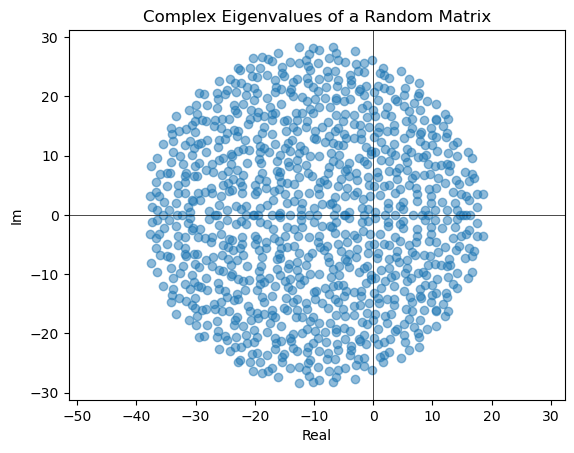

In [2]:
import matplotlib.pyplot as plt
eigenvalues_random = np.linalg.eigvals(M_random)

real_rand=np.real(eigenvalues_random)
imag_rand=np.imag(eigenvalues_random)
plt.scatter(real_rand, imag_rand,alpha=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Im')
plt.title('Complex Eigenvalues of a Random Matrix')
plt.axis('equal')

In this case $\rho=0$. Th system is stable beacuse the majority of eigenvalues are negative.

## Random Matrix Describing Predator-Prey System
Built using following instruction: In the predator-prey case, i) For each pair of interactions (Mij,Mji)i>j, we draw a random value p1 from a uniform distribution U[0,1]. ii) If p1 ≤ C, we draw a second random value p2 from U[0,1]. iii) If p2 ≤ 0.5, we draw Mij from a half-normal distribution |N(0,σ2)| and Mji from a negative half-normal −|N(0,σ2)|, while if p2 > 0.5 we do the opposite. iv) If p1 > C, we assign 0 to both Mij and Mji. v) All diagonal terms, Mii, are set to −d.

In [3]:
import numpy as np

#growth rate
d=10
#Connectivity
C = 0.8
#Numbeer of Species
S=1000
#Matrix inizialization
M_pro = np.zeros((S,S))

# Matrix Condition
for i in range(S):
    for j in range(S):
        if i != j:  # Elements not in the diagonal
            p1 = np.random.rand(1)
            if p1 <= C:
                p2 = np.random.rand(1)
                if p2 <= 0.5:
                    M_pro[i, j] = np.abs(np.random.normal(0, 1, 1))
                    M_pro[j, i] = -np.abs(np.random.normal(0, 1, 1))
                else:
                    M_pro[i, j] = -np.abs(np.random.normal(0, 1, 1))
                    M_pro[j, i] = np.abs(np.random.normal(0, 1, 1))
            else:
                M_pro[i, j] = 0
                M_pro[j, i] = 0

# Elements in the diagonal

np.fill_diagonal(M_pro, -d)


(-21.157367807910152,
 1.4972970134556984,
 -51.02762719453711,
 51.02762719453711)

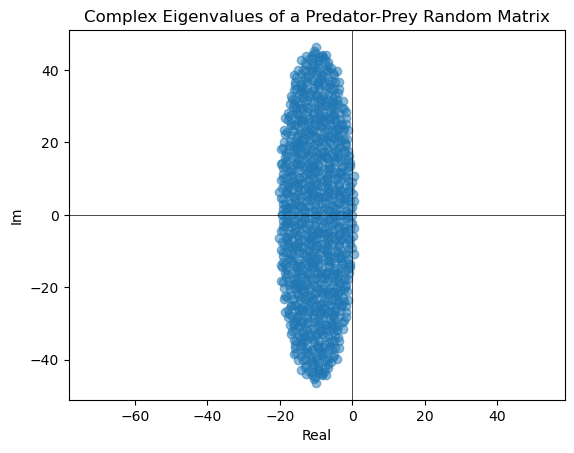

In [4]:
import matplotlib.pyplot as plt
eigenvalues_pred = np.linalg.eigvals(M_pro)

real=np.real(eigenvalues_pred)
imag=np.imag(eigenvalues_pred)
plt.scatter(real, imag,alpha=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Im')
plt.title('Complex Eigenvalues of a Predator-Prey Random Matrix')

plt.axis('equal')

In this case $\rho<0$ so we are in the more stable case, and the majority of real part of the eignvalues are negative.

## Study of how the max value of the eigenvalues change in a random Matrix due the dimension of the matrix, which in this case refers to number of species.

### Random case

In [5]:
import numpy as np

# Settings
C = 0.8
d = 10.0
matrix_dim = [20, 50, 100, 200, 1000]
rand_eig=[]

#Dictionary Initialization to memorize vector for each dimension
eig_dict_rand = {}

# Cicle on matrix Dimension
for S in matrix_dim:
   
    #Matrix Code
    M_random = np.zeros((S, S))

    
    for i in range(S):
        for j in range(S):
            if i != j:  
                p = np.random.rand(1)
                if p <= C:
                    M_random[i, j] = np.random.normal(0, 1, 1)
                else:
                    M_random[i, j] = 0

    
    np.fill_diagonal(M_random, -d)

    # Eigenvalues Calculation
    eigenvalues = np.linalg.eigvals(M_random)

    # Maximum Eigenvalues
    max_eigenvalue = np.max(np.real(eigenvalues))

    # Add the vector the dictionary
    eig_dict_rand[S] = np.real(eigenvalues)
    
    rand_eig.append(max_eigenvalue)




### Predator-prey case

In [6]:
import numpy as np

# Settings
C = 0.8
d = 10.0
matrix_dim = [20, 50, 100, 200, 1000]

# Dictionary Initialization to memorize vector for each dimension
eig_dict_pred = {}
pred_eig=[]
#Cicle on matrix dimension
for S in matrix_dim:
    #Matrix Code
    M_pro = np.zeros((S, S))

    
    for i in range(S):
        for j in range(S):
            if i != j: 
                p1 = np.random.rand(1)
                if p1 <= C:
                    p2 = np.random.rand(1)
                    if p2 <= 0.5:
                        M_pro[i, j] = np.abs(np.random.normal(0, 1, 1))
                        M_pro[j, i] = -np.abs(np.random.normal(0, 1, 1))
                    else:
                        M_pro[i, j] = -np.abs(np.random.normal(0, 1, 1))
                        M_pro[j, i] = np.abs(np.random.normal(0, 1, 1))
                else:
                    M_pro[i, j] = 0
                    M_pro[j, i] = 0

    
    np.fill_diagonal(M_pro, -d)

    #Eigenvalues Calculation
    eigenvalues = np.linalg.eigvals(M_pro)

    # Adding the real part of the eigenvalue to dictionary
    eig_dict_pred[S] = np.real(eigenvalues)

    # Saving the maximum eigenvalue 
    pred_eig.append(np.max(np.real(eigenvalues)))
    



Definition of control function looking for the best parameters, in this case, curve_fit from scipy optimize has been used.

In [7]:
def control(S, C, sigma):
    return sigma * np.sqrt(S * C)-d

In [8]:
import numpy as np
from scipy.optimize import curve_fit

# Data
S = matrix_dim
data = pred_eig
C=0.8
# Function
def reference_function(S, a, b, e):
    return np.power(C,a) * np.power(b, S) * np.power(S, e)-d

#  curve_fit
params, covariance = curve_fit(reference_function, S, data)

# Parameters
a_opt, b_opt, e_opt = params


print(f"Coefficients: a={a_opt}, b={b_opt}, e={e_opt}")


Coefficients: a=2.548019219600474, b=1.0001818339424215, e=0.39740080096463803


In [9]:
import numpy as np
from scipy.optimize import curve_fit

# Data
S = matrix_dim
data = rand_eig
C=0.8
# Function
def control_ref(S, a, b, e):
    return np.power(C,a) * np.power(b, S) * np.power(S, e)-d

# curve_fit
params, covariance = curve_fit(reference_function, S, data)

# Parameters
a_opt_rand, b_opt_rand, e_opt_rand = params


print(f"Coefficients: a={a_opt_rand}, b={b_opt_rand}, e={e_opt_rand}")



Coefficients: a=0.7406725878121044, b=1.00009002370636, e=0.49424808663887826


Graphic Result of the study, this means there is an anlytical curve which is compatible with data. For the random case also the example function $f(s)=\sigma \sqrt{SC}$ has been provided and compared with curve fit parameters,

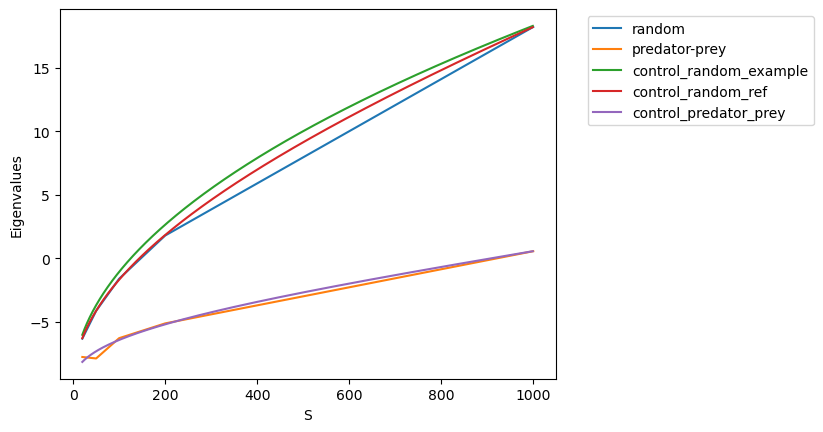

In [10]:
S=np.arange(20,1000,1)

plt.plot(matrix_dim,rand_eig,label='random')
plt.plot(matrix_dim, pred_eig,label='predator-prey')
plt.plot(S,control(S,0.8,1),label='control_random_example')
plt.plot(S,control_ref(S,a_opt_rand,b_opt_rand,e_opt_rand),label='control_random_ref')
plt.plot(S,reference_function(S, a_opt, b_opt, e_opt),label='control_predator_prey')
plt.xlabel('S')
plt.ylabel('Eigenvalues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Here the probability to obtain positive and negative eigenvalues (considering the real part of the eigenvalues). For the parameter that has been choosen for C and d, the probability to obtain negative eigenvalues is very very high.

Random Case

In [11]:
for S, eig_values in eig_dict_rand.items():
    #positive eigenvalues
    pos_rand=eig_values[eig_values >= 0]
    
    #negative eigenvalues
    neg_rand=eig_values[eig_values<0]
    
    real_rand=np.real(eig_values)
    im_rand=np.imag(eig_values)
    print(f"Matrix Dimension {S}x{S}: P(Re(lambda>0)) for total random case: {len(pos_rand)/S}")
    print(f"Matrix Dimension {S}x{S}: P(Re(lambda<0)) for total random case: {len(neg_rand)/S} \n")
    

Matrix Dimension 20x20: P(Re(lambda>0)) for total random case: 0.0
Matrix Dimension 20x20: P(Re(lambda<0)) for total random case: 1.0 

Matrix Dimension 50x50: P(Re(lambda>0)) for total random case: 0.0
Matrix Dimension 50x50: P(Re(lambda<0)) for total random case: 1.0 

Matrix Dimension 100x100: P(Re(lambda>0)) for total random case: 0.0
Matrix Dimension 100x100: P(Re(lambda<0)) for total random case: 1.0 

Matrix Dimension 200x200: P(Re(lambda>0)) for total random case: 0.05
Matrix Dimension 200x200: P(Re(lambda<0)) for total random case: 0.95 

Matrix Dimension 1000x1000: P(Re(lambda>0)) for total random case: 0.278
Matrix Dimension 1000x1000: P(Re(lambda<0)) for total random case: 0.722 



Predator-Prey Case

In [12]:
for S, eig_values in eig_dict_pred.items():
    #positive eigenvalues
    pos_pred=eig_values[eig_values >= 0]
    
    #negative eigenvalues
    neg_pred=eig_values[eig_values<0]
    
    print(f"Matrix Dimension {S}x{S}: P(Re(lambda>0)) for predator-prey case: {len(pos_pred)/S}")
    print(f"Matrix Dimension {S}x{S}: P(Re(lambda<0)) for predator-prey case: {len(neg_pred)/S} \n")

Matrix Dimension 20x20: P(Re(lambda>0)) for predator-prey case: 0.0
Matrix Dimension 20x20: P(Re(lambda<0)) for predator-prey case: 1.0 

Matrix Dimension 50x50: P(Re(lambda>0)) for predator-prey case: 0.0
Matrix Dimension 50x50: P(Re(lambda<0)) for predator-prey case: 1.0 

Matrix Dimension 100x100: P(Re(lambda>0)) for predator-prey case: 0.0
Matrix Dimension 100x100: P(Re(lambda<0)) for predator-prey case: 1.0 

Matrix Dimension 200x200: P(Re(lambda>0)) for predator-prey case: 0.0
Matrix Dimension 200x200: P(Re(lambda<0)) for predator-prey case: 1.0 

Matrix Dimension 1000x1000: P(Re(lambda>0)) for predator-prey case: 0.004
Matrix Dimension 1000x1000: P(Re(lambda<0)) for predator-prey case: 0.996 



## Simulation for a Generalized Lotka Volterra Model with costant growth-rate set to 1.

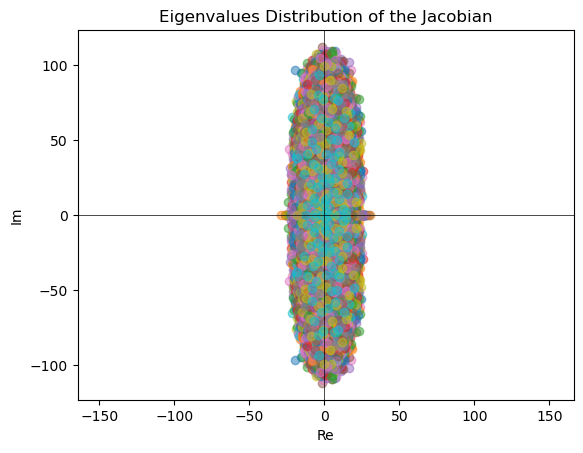

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
num_simulations = 1000
dimension = 100  # Jacobian Dimension
growth_rate = 1.0
interaction_range = [1, 10]  # Range for random interaction
C=0.8
sigma=1

eig_dict = {}

# Simulations
for _ in range(num_simulations):
    # Random array for c*
    x_star = np.random.uniform(interaction_range[0], interaction_range[1], dimension)

    M_pro=np.zeros((dimension,dimension))
    for i in range(dimension):
        for j in range(dimension):
            if i != j:  
                p1 = np.random.rand(1)
                if p1 <= C:
                    p2 = np.random.rand(1)
                    if p2 <= 0.5:
                        M_pro[i, j] = np.abs(np.random.normal(0, sigma, 1))*x_star[j]
                        M_pro[j, i] = -np.abs(np.random.normal(0, sigma, 1))*x_star[j]
                    else:
                        M_pro[i, j] = -np.abs(np.random.normal(0,sigma, 1))*x_star[j]
                        M_pro[j, i] = np.abs(np.random.normal(0, sigma, 1))*x_star[j]
                else:
                    M_pro[i, j] = 0
                    M_pro[j, i] = 0


    d = -1.0  
    np.fill_diagonal(M_pro, -d)
    

    # test of elliptic stability
    if np.sqrt(C * dimension) - d < 0:
        print(f'Simulation {_ + 1}: The system is stable for the elliptic law')
    
    
    eigenvalues = np.linalg.eigvals(M_pro)

    
    eig_dict[_] = eigenvalues

#Graphic visualization
fig, ax = plt.subplots()
for _, eig_values in eig_dict.items():
    ax.scatter(np.real(eig_values), np.imag(eig_values), alpha=0.5)

# Aggiungi assi che passano per l'origine
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Imposta i titoli e le etichette degli assi
plt.title('Eigenvalues Distribution of the Jacobian')
plt.xlabel('Re')
plt.ylabel('Im')
plt.axis('equal')
# Mostra il plot
plt.show()


The circular law is still valid in the sense that all the eigenvalues for each simultaion lies on a elipse, but in this case considering the stability criteria provided by the elliptic law the system is unstable.